<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_4_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<img src="https://i.stack.imgur.com/P3mN9.png" alt="fit_intercept in sklearn">

In [2]:
'''
lr_model = LinearRegression()
fit_intercept > false > y=m*x & b=0
normalize=True > depricate
n_jobs=2 > multi-thread

lr_model.fit(X, y) > it is not iterative > it calculates for lin reg with equations
lr_model.predict(X)
lr_model.score(X, y)
lr_model.coef_ #m or w=[,,,]
lr_model.intercept_ #b
'''

'\nlr_model = LinearRegression()\nfit_intercept > false > y=m*x & b=0\nnormalize=True > depricate\nn_jobs=2 > multi-thread\n\nlr_model.fit(X, y) > it is not iterative > it calculates for lin reg with equations\nlr_model.predict(X)\nlr_model.score(X, y)\nlr_model.coef_ #m or w=[,,,]\nlr_model.intercept_ #b\n'

# Data Processing

In [3]:
x1 = np.random.rand(3)
print(x1.shape)
x2 = np.random.rand(3,1)
print(x2.shape)

# convert to matrix
x3 = x1.reshape(-1,1)
print(x3.shape)
# convert to 1D array
x4 = np.hstack((x3))
print(x1==x4)

print(x1)
print(x2)
print(x3)

(3,)
(3, 1)
(3, 1)
[ True  True  True]
[0.96343012 0.0995961  0.04522536]
[[0.92626247]
 [0.4221349 ]
 [0.36785269]]
[[0.96343012]
 [0.0995961 ]
 [0.04522536]]


In [4]:
x = np.random.rand(100) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

print(x.shape, y.shape)

(100,) (100,)


In [5]:
# ways to create matrix > fit accepts x as matrix but not necessary for y to be matrix > 1.
x = np.random.rand(100,1) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

print(x.shape, y.shape)

(100, 1) (100, 1)


In [6]:
# 2.
x = np.random.rand(100) * 20
y = 2.358 * x - 3.121
y = y + np.random.normal(scale=3, size=y.shape)

x = x.reshape(-1,1)

print(x.shape, y.shape)

(100, 1) (100,)


# Normalization & Standarization

We want to do scale features between 0 to 1  
<img src="https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-9613d6dab45efff839236cb185a61e49_l3.svg" />

In [7]:
# another definition
m = x.mean(axis=0)
s = x.std(axis=0)
normalized_x = (x - m) / s
print(normalized_x.min(),normalized_x.max(),normalized_x.mean(),normalized_x.std())

-1.7503909704920453 1.8341728003275881 -1.4988010832439614e-16 1.0


In [9]:
min = x.min(axis=0)
max = x.max(axis=0)
normalized_x = (x - min) / max
print(normalized_x.min(),normalized_x.max(),normalized_x.mean(),normalized_x.std())

0.0 0.9906876332406505 0.48376617035496594 0.2763760659819768


In [24]:
# lr_model = LinearRegression(normalize=True) > normalize is depricated > we have to normalize ourselves

'''
Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range.
Data normalization is used in machine learning to make model training less sensitive to the scale of features.
This allows our model to converge to better weights and, in turn, leads to a more accurate model.
'''

'''
axis represents the dimension in numpy. 
For 2-d data, axis=0 means 1st dimension (that is row wise) which is appropriate for scale, 
because you want to scale the values of different samples for same feature. 
axis=1 means column wise that is scale each sample indepently. 
sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)
if 1, independently normalize each sample, otherwise (if 0) normalize each feature. > 0 is more rational
'''

'''
we use preprocessing function of sklearn

it has a param called norm > l1, l2, max
default=’l2’
'''

# the normalization itself
'''Normalization is the process of scaling individual samples to have unit norm. 
This process can be useful if you plan to use a quadratic form such as the dot-product or 
any other kernel to quantify the similarity of any pair of samples.
'''

'Normalization is the process of scaling individual samples to have unit norm. \nThis process can be useful if you plan to use a quadratic form such as the dot-product or \nany other kernel to quantify the similarity of any pair of samples.\n'

In [34]:
x_multidim = np.random.randint(10,size=(3,4))
print(x_multidim)

print(x.shape)
print(x[:3,:])

[[9 9 4 6]
 [6 9 5 6]
 [4 7 4 7]]
(100, 1)
[[ 2.34218221]
 [ 6.76524718]
 [19.56329098]]


In [35]:
from sklearn import preprocessing

# the sum of |features| for each row=1 > in normalization the output can be pos or neg
x_multidim_l1 = preprocessing.normalize(x_multidim, norm="l1")
print(x_multidim_l1)
#3*4 > axis=0 > 1*4 > work on cols
print(x_multidim_l1.sum(axis=0))
#3*4 > axis=1 > 1*3 > work on rows
# it sould sum with absolute
print(x_multidim_l1.sum(axis=1))
print(x_multidim_l1.sum())

x_l1 = preprocessing.normalize(x, norm="l1")
print(x_l1[:3,:])

[[0.32142857 0.32142857 0.14285714 0.21428571]
 [0.23076923 0.34615385 0.19230769 0.23076923]
 [0.18181818 0.31818182 0.18181818 0.31818182]]
[0.73401598 0.98576424 0.51698302 0.76323676]
[1. 1. 1.]
3.0
[[1.]
 [1.]
 [1.]]


In [49]:
# np.sqrt(Sigma(features**2)) = 1
x_multidim_l2 = preprocessing.normalize(x_multidim, norm="l2")
print(x_multidim_l2)
# working with the np.sum 
# x_multidim_l2.sum(axis=1) > [1.9140406  1.94878239 1.92952764]
# np.sum(x_multidim_l2, axis=1) > [1.9140406  1.94878239 1.92952764]
print(np.sqrt(np.sum(x_multidim_l2**2,axis=1)))

x_l2 = preprocessing.normalize(x, norm="l2")
print(x_l2[:3,:])

[[0.61522733 0.61522733 0.27343437 0.41015156]
 [0.44971901 0.67457852 0.37476584 0.44971901]
 [0.35082321 0.61394061 0.35082321 0.61394061]]
[1. 1. 1.]
[[1.]
 [1.]
 [1.]]


In [51]:
# max absolute value in each row= 1 > others are the percentage of -1 to 1 with considering the max
# 9>1 -- 4/9=0.4444
x_multidim_max = preprocessing.normalize(x_multidim, norm="max")
print(x_multidim_max)

x_max = preprocessing.normalize(x, norm="max")
print(x_max[:3,:])

[[1.         1.         0.44444444 0.66666667]
 [0.66666667 1.         0.55555556 0.66666667]
 [0.57142857 1.         0.57142857 1.        ]]
[[1.]
 [1.]
 [1.]]


In [55]:
# default axis=1 > means each col > we have one col > return 1 for all values
# fro scaling we need to consider all of the samples of the same features > rows > 0
# default is l2

x_multidim_l2 = preprocessing.normalize(x_multidim, axis=0)
print(x_multidim_l2)
print(np.sqrt(np.sum(x_multidim_l2**2,axis=0)))

# normalization > you don't have number above 1
normalized_x = preprocessing.normalize(x,axis=0)
print(normalized_x.min(),normalized_x.max(),normalized_x.mean(),normalized_x.std())
# only have one column
print(np.sqrt(np.sum(normalized_x**2,axis=0)))

[[0.78039897 0.61958555 0.52981294 0.54545455]
 [0.52026598 0.61958555 0.66226618 0.54545455]
 [0.34684399 0.48189987 0.52981294 0.63636364]]
[1. 1. 1. 1.]
0.0016474708019235066 0.17691214752355602 0.08723158289866692 0.04889428335698352
[1.]


In [58]:
# normalization pipeline > normalize all of the data 
# default is axis=1 > on each row individually > l2 norm
# Normalize samples individually to unit norm. > it doean't have the axis to set 0 ???
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

normalizer = preprocessing.Normalizer().fit(x)
normalized_x = normalizer.transform(x)
print(normalized_x[:3,:])
print(normalized_x.min(),normalized_x.max(),normalized_x.mean(),normalized_x.std())

[[1.]
 [1.]
 [1.]]
1.0 1.0 1.0 0.0


In [59]:
# 2.
from sklearn.preprocessing import MinMaxScaler

'''
Transform features by scaling each feature to a given range. > features are cols BUT samples are rows
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

for nomalization we use minMax scaler
we fit a scaler on the test data, then transform the whole dataset with it.
By doing this, we completely ignore the test dataset while building the model.

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

x as input must be matrix
'''
min_max_scaler = MinMaxScaler().fit(x)
x_norm = min_max_scaler.transform(x)
print(x_norm[:3,:])
print(x_norm.min(),x_norm.max(),x_norm.mean(),x_norm.std())

[[0.10927983]
 [0.3333991 ]
 [0.98188341]]
0.0 0.9999999999999999 0.4883135249932538 0.2789739739436533


In [60]:
'''
for standarization > we use standard scaler
default: the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0

scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X)

or 

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
'''
print(x.min(),x.max(),x.mean(),x.std())

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std = scaler.fit_transform(x)
print(x_std.min(),x_std.max(),x_std.mean(),x_std.std())

0.18551005296315592 19.920827621711222 9.822532541819816 5.505639969193646
-1.7503909704920453 1.8341728003275881 -1.4988010832439614e-16 1.0


# Fit model

In [61]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [62]:
lr_model = LinearRegression()

# optional how to give y > array ot matrix
lr_model.fit(x, y)
print(lr_model.coef_, lr_model.intercept_)

[47.73879469] -3.570513473273799


In [63]:
lr_model.score(x, y)

0.9549290622056755

In [64]:
h = lr_model.predict(x)
MSE = np.mean((y - h) ** 2) / 2
print(MSE)

4.185677517975085


In [65]:
# lr_model.score(x, y)

1 - (2*MSE / y.var())

0.9549290622056755

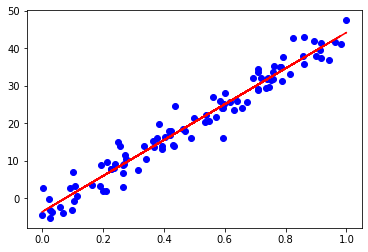

In [66]:
plt.plot(x,y,'bo')
plt.plot(x,h,'r--')
plt.show()

# Non-Linear Regression

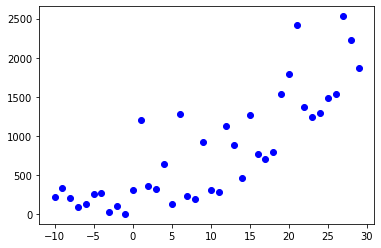

In [67]:
x = np.arange(-10, 30, 1).reshape(-1, 1)
# create polynomial degrees
x_2 = np.hstack((x,x**2))

y_2 = 2 * x_2[:,0] + 2.15 * x_2[:,1] - 3.121
y_2 = y_2 + np.random.normal(scale=20, size=y_2.shape)**2

plt.plot(x_2[:,0],y_2,'bo')

In [68]:
# we have two features
lr_model.fit(x_2,y_2)
print( lr_model.coef_ , lr_model.intercept_ )

print(lr_model.score(x_2,y_2))

[22.42375294  1.40407901] 302.8085169194179
0.722600604977847


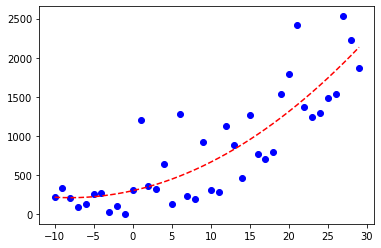

In [69]:
# we have two features now
h = lr_model.predict(x_2)

plt.plot(x_2[:, 0], y_2, 'bo')
plt.plot(x_2[:, 0], h, 'r--')

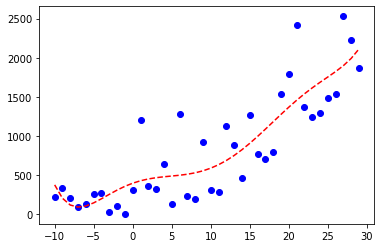

In [70]:
x = np.arange(-10, 30, 1).reshape(-1, 1)
x_6 = np.hstack((x,x**2,x**3,x**4,x**5,x**6))

# learn y_2 with degree6
lr_model.fit(x_6,y_2)

h = lr_model.predict(x_6)

plt.plot(x_6[:, 0], y_2, 'bo')
plt.plot(x_6[:, 0], h, 'r--')